In [1]:
import cv2
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import pytesseract

In [2]:
img = cv2.imread("../montek.jpeg")

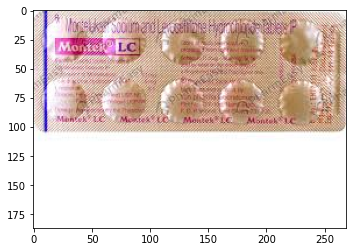

In [3]:
plt.imshow(img)

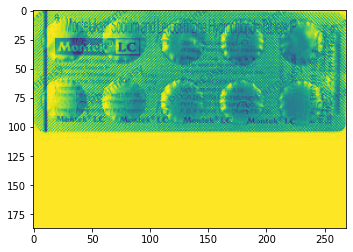

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [5]:
_, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


In [6]:
img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]


In [7]:
img_contours = sorted(img_contours, key=cv2.contourArea)

for i in img_contours:

    if cv2.contourArea(i) > 100:

        break

In [8]:
mask = np.zeros(img.shape[:2], np.uint8)


In [9]:
cv2.drawContours(mask, [i],-1, 255, -1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
new_img = cv2.bitwise_and(img, img, mask=mask)


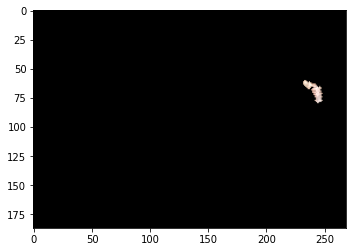

In [11]:
plt.imshow(new_img)

In [12]:
im=img
row, col = im.shape[:2]
bottom = im[row-2:row, 0:col]
mean = cv2.mean(bottom)[0]

bordersize = 10
border = cv2.copyMakeBorder(
    im,
    top=bordersize,
    bottom=bordersize,
    left=bordersize,
    right=bordersize,
    borderType=cv2.BORDER_CONSTANT,
    value=[mean, mean, mean]
)

# cv2.imshow('image', im)
# cv2.imshow('bottom', bottom)
# cv2.imshow('border', border)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

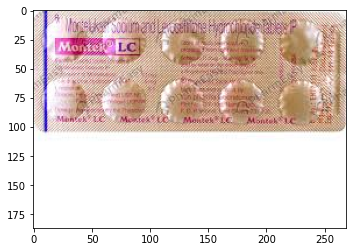

In [13]:
plt.imshow(img)

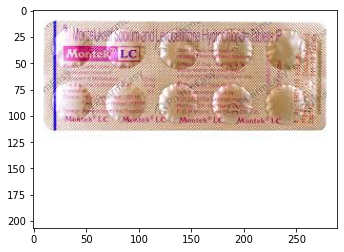

In [14]:
plt.imshow(img)
plt.imshow(bottom)
plt.imshow(border)

In [15]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 192, cv2.THRESH_OTSU)

print(th)

196.0


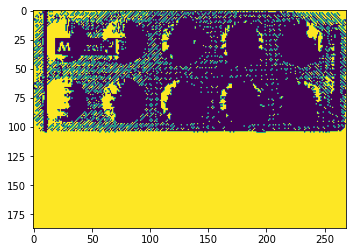

In [16]:
plt.imshow(im_gray_th_otsu)

In [17]:
# image=img
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

gray1 = gray[:, :25]
gray2 = gray[:, 25:50]
gray3 = gray[:, 50:75]
gray4 = gray[:, 75:100]
gray5 = gray[:, 100:125]
gray6 = gray[:, 125:]

print(''.join([pytesseract.image_to_string(i, config='--psm 10 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ') for i in [gray1, gray2, gray3, gray4, gray5, gray6]]))

NameError: name 'image' is not defined

In [18]:
plt.imshow(gray)

NameError: name 'gray' is not defined

In [23]:
import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()


KeyboardInterrupt: 

In [14]:
image = cv2.imread("opencv_frame_3.png")

In [7]:
# import cv2

# cam = cv2.VideoCapture(0)

# cv2.namedWindow("test")

# img_counter = 0

# while True:
#     ret, frame = cam.read()
#     if not ret:
#         print("failed to grab frame")
#         break
#     cv2.imshow("test", frame)
    
#     k = cv2.waitKey(1)
#     print(k)
#     if k%256 == 27:
#         # ESC pressed
#         print("Escape hit, closing...")
#         break
#     elif k%256 == 32:
#         # SPACE pressed
#         img_name = "opencv_frame_{}.png".format(img_counter)
#         cv2.imwrite(img_name, frame)
#         print("{} written!".format(img_name))
#         img_counter += 1
#     if img_counter>3:
#         break
#     else:
#         img_name = "opencv_frame_{}.png".format(img_counter)
#         cv2.imwrite(img_name, frame)
#         print("{} written!".format(img_name))
#         img_counter += 1
        

# cam.release()

# cv2.destroyAllWindows()


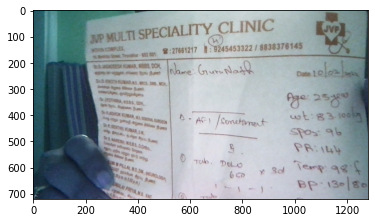

In [15]:
plt.imshow(image)

In [20]:
from pytesseract import Output

# image = cv2.imread(image)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

In [21]:
results

{'level': [1,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  2,
  3,
  4,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5],
 'par_num': [0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1],
 'line_num': [0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  2,
  2,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  0,
  0,
  1,
  1],
 'word_num': [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
 

In [25]:
for i in range(0, len(results["text"])):
    # extract the bounding box coordinates of the text region from
    # the current result
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]

    # extract the OCR text itself along with the confidence of the
    # text localization
    text = results["text"][i]
    conf = float(results["conf"][i])

In [24]:
results["conf"][i]

'95.000000'

In [27]:
# if conf > args["min_conf"]:
# display the confidence and text to our terminal
print("Confidence: {}".format(conf))
print("Text: {}".format(text))
print("")

# strip out non-ASCII text so we can draw the text on the image
# using OpenCV, then draw a bounding box around the text along
# with the text itself
text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
    1.2, (0, 0, 255), 3)


Confidence: 95.0
Text: 



array([[[ 37,  83,  96],
        [ 36,  82,  95],
        [ 35,  83,  96],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 38,  84,  97],
        [ 37,  83,  96],
        [ 35,  83,  96],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 39,  85,  98],
        [ 38,  84,  97],
        [ 38,  84,  97],
        ...,
        [ 41,  55,  60],
        [ 39,  52,  54],
        [  0, 255,   0]],

       ...,

       [[ 52,  72,  87],
        [ 54,  74,  88],
        [ 59,  78,  89],
        ...,
        [120, 137, 148],
        [120, 137, 148],
        [  0, 255,   0]],

       [[ 48,  70,  85],
        [ 44,  67,  81],
        [ 43,  67,  79],
        ...,
        [122, 138, 149],
        [120, 137, 148],
        [  0, 255,   0]],

       [[ 44,  67,  81],
        [ 38,  60,  75],
        [ 34,  57,  69],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [31]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext('../montek.jpeg',paragraph="False")
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[19, 25], [93, 25], [93, 41], [19, 41]], 'Mort r"Ld'],
 [[[115, 11], [255, 11], [255, 49], [115, 49]], '34d']]

In [32]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext('../dolo.png',paragraph="False")
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[233, 19], [489, 19], [489, 163], [233, 163]],
  'Over dose may be injurious to Liver: Mlp: Lic_ No: Mv600/2012 Now AVAILABLE IN NEW15 : PACK Mode In India by Micao LABS LIMITED Mamring; Namthang Road_ South Sikkm-737 132 MLZAF-0043 Regd_ Trodo Hod'],
 [[[213, 63], [594, 63], [594, 579], [213, 579]],
  ' Dolo-650 Srair-ey0 Bele-650 8 Poracetamol Toblets IP 8 Dolo-650 sar-ey0 Eoch uncoaled tablet contains: Paracetamol IP 650 mg 1 Dosage directed by the Physicion: Keep in @ cool, dry place. Protedt from light Over dose may be injurious to Liver Mip: LcNo: N600/2012 NOWAVAILABLE In Modo In Indio by NEW 19_PACK MicrO LABS LIMITED 1 Mamring; Namthang  Road, South Sikklm-737 132 Rcod Troda Mork) ML2AF-0043'],
 [[[101, 199], [117, 199], [117, 283], [101, 283]], '? 8'],
 [[[101, 337], [119, 337], [119, 423], [101, 423]], '1'],
 [[[214, 596], [494, 596], [494, 622], [214, 622]],
  'polo-650  Srar-ey0  Dolo-650'],
 [[[99, 631], [113, 631], [113, 659], [99, 659]], '8'],
 [[[212, 638], [498, 63

In [33]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext('opencv_frame_3.png',paragraph="False")
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[210, 21], [1280, 21], [1280, 693], [210, 693]],
  '\'MLLTI SPECIALITYCLINIC Uvpe J TDu 27861217 9245453322 8038376145 Le Reneid - 89264 Aes04 Nare : Gvuru Na4 Oate Tolez Vaa Axe 25" e M@edd cL:83 /80 3 ( Cuntixt Vurel Spoz: 96 ea Ea Jds ce Pa:44 T4b ALA Do_O VDLu Ral Terp 48 ( anotn Bp \'3e/80']]

In [36]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext('../crocin.jpeg',paragraph="False")
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[230, 39], [394, 39], [394, 79], [230, 79]],
  'All eaid Inalmd Kact Cm Tm Tama Fececis Machviu'],
 [[[97, 57], [135, 57], [135, 79], [97, 79]], 'Crorin" Vanrennn'],
 [[[170, 37], [425, 37], [425, 170], [170, 170]],
  '8 5 BAOcACEEMAOL FAST reLEASE TABLETS Andindsie 45TanieTe Kp Dei'],
 [[[485, 43], [499, 43], [499, 125], [485, 125]], '{ 1'],
 [[[97, 167], [129, 167], [129, 187], [97, 187]], 'Croci'],
 [[[97, 259], [127, 259], [127, 275], [97, 275]], 'Groci'],
 [[[322, 264], [398, 264], [398, 272], [322, 272]], 'annla rureemnaunned'],
 [[[222, 285], [405, 285], [405, 343], [222, 343]],
  'Vee 1azt Rcaiban eruln 5e seoolrtos Fam Kams Fa Cecs ichaie'],
 [[[480, 300], [506, 300], [506, 419], [480, 419]], '81 5 2'],
 [[[94, 350], [138, 350], [138, 376], [94, 376]], 'odn'],
 [[[244, 358], [278, 358], [278, 366], [244, 366]], 'Ttne'],
 [[[170, 380], [400, 380], [400, 417], [170, 417]],
  'ProciCEqaBrOL FAST release TabLETS Andungaoi Aallrelk 45 TABLETS']]

In [45]:
for i in result:
    if isinstance(i,str):
        print(i)

In [30]:
from skimage import data
from skimage.color import rgb2gray

In [49]:
from googlesearch import search
for url in search('crocin uses', stop=10):
    if "1mg" in url :
        dd=requests.get(url)
        print(url)

https://www.1mg.com/drugs/crocin-advance-tablet-117239


In [48]:
import requests
requests.get(url)

<Response [200]>

In [51]:
dd.text

'<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <meta charset="utf-8" />\n        <meta\n            name="viewport"\n            content="initial-scale=1, maximum-scale=1, user-scalable=no, width=device-width height=device-height"\n        />\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n        <meta http-equiv="x-dns-prefetch-control" content="on" />\n\n        <meta name="theme-color" content="#FFF3E3" />\n        <!-- Windows Phone -->\n        <meta name="msapplication-navbutton-color" content="#FFF3E3" />\n        <!-- iOS Safari -->\n        <meta name="apple-mobile-web-app-status-bar-style" content="#FFF3E3" />\n        <meta name="apple-mobile-web-app-capable" content="yes" />\n\n        \n\n        <!-- Dynamic seo tags -->\n        \n        <title>Crocin Advance Tablet: View Uses, Side Effects, Price and Substitutes | 1mg</title>\n        <meta name="keywords" content="Crocin Advance Tablet, Crocin Advance Tablet price, Crocin Advance T